In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, root_mean_squared_error

plt.rcParams["figure.figsize"] = (10, 5)
sns.set_style("whitegrid")

This project uses open air quality data provided by **ArmeniaBlackouts.org**.

In [32]:
BASE = "https://armeniablackouts.org/data"
PATH_SENSORS = f"{BASE}/sensors.csv"
PATH_SENSOR_DAILY = f"{BASE}/sensor_avg_daily.csv"
PATH_STATION_DAILY = f"{BASE}/station_avg_daily.csv"
PATH_CITY_DAILY = f"{BASE}/city_avg_daily.csv"
PATH_CITY_HOURLY_2025 = f"{BASE}/city_avg_hourly/city_avg_hourly_2025.csv"


sensors = pd.read_csv(PATH_SENSORS)
sensor_daily = pd.read_csv(PATH_SENSOR_DAILY)
station_daily = pd.read_csv(PATH_STATION_DAILY)
city_daily = pd.read_csv(PATH_CITY_DAILY)
city_hourly_2025 = pd.read_csv(PATH_CITY_HOURLY_2025)

In [33]:
print(city_daily.shape)
city_daily.tail()

(3602, 19)


,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,avg_humidity,avg_no2,avg_dust,avg_o3,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh
3597,yerevan,2025-12-17 00:00:00,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,68.0,25.0,NaN,NaN,NaN,0.0,5.3,28.0,NaN
3598,yerevan,2025-12-18 00:00:00,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,65.0,25.0,NaN,NaN,NaN,0.0,4.5,56.0,0.17
3599,yerevan,2025-12-19 00:00:00,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,65.0,29.0,NaN,NaN,NaN,0.0,4.0,38.0,0.18
3600,yerevan,2025-12-20 00:00:00,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,66.0,31.0,NaN,NaN,NaN,0.0,3.8,42.0,0.17
3601,yerevan,2025-12-21 00:00:00,89.9,44.9,158.4,133.3,1.0,-2.5,6.5,89517.0,67.0,30.0,NaN,NaN,NaN,0.0,4.0,39.0,0.19


In [34]:
city_d = city_daily[city_daily["city_slug"] == "yerevan"].copy()
city_d.sort_values("timestamp", inplace=True)
print(city_d.shape)
city_d.tail()

(2516, 19)


,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,avg_humidity,avg_no2,avg_dust,avg_o3,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh
3597,yerevan,2025-12-17 00:00:00,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,68.0,25.0,NaN,NaN,NaN,0.0,5.3,28.0,NaN
3598,yerevan,2025-12-18 00:00:00,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,65.0,25.0,NaN,NaN,NaN,0.0,4.5,56.0,0.17
3599,yerevan,2025-12-19 00:00:00,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,65.0,29.0,NaN,NaN,NaN,0.0,4.0,38.0,0.18
3600,yerevan,2025-12-20 00:00:00,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,66.0,31.0,NaN,NaN,NaN,0.0,3.8,42.0,0.17
3601,yerevan,2025-12-21 00:00:00,89.9,44.9,158.4,133.3,1.0,-2.5,6.5,89517.0,67.0,30.0,NaN,NaN,NaN,0.0,4.0,39.0,0.19


In [35]:
city_d.info()

city_d.isna().sum().sort_values(ascending=False).head()


<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 1086 to 3601
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_slug           2516 non-null   object 
 1   timestamp           2516 non-null   object 
 2   avg_pm2.5           2516 non-null   float64
 3   min_pm2.5           2516 non-null   float64
 4   max_pm2.5           2516 non-null   float64
 5   avg_pm10            2516 non-null   float64
 6   avg_temperature     2421 non-null   float64
 7   min_temperature     2421 non-null   float64
 8   max_temperature     2421 non-null   float64
 9   avg_pressure        2516 non-null   float64
 10  avg_humidity        2421 non-null   float64
 11  avg_no2             482 non-null    float64
 12  avg_dust            246 non-null    float64
 13  avg_o3              238 non-null    float64
 14  avg_so2             241 non-null    float64
 15  total_rain          1086 non-null   float64
 16  avg_wind

,0
avg_o3,2278
avg_so2,2275
avg_dust,2270
avg_no2,2034
avg_usvh,1622


PM2.5 and PM10 are types of airborne particulate matter, differentiated by size: PM10 refers to larger inhalable particles (10 micrometers and smaller), while PM2.5 are much finer particles (2.5 micrometers and smaller),

In [36]:
# Drop rows where PM2.5 is missing
city_d = city_d.dropna(subset=["avg_pm2.5"])


weather_cols = ["avg_temperature", "avg_humidity", "avg_pressure"]
city_d[weather_cols] = city_d[weather_cols].interpolate()


In [37]:
city_d['timestamp'].min(), city_d['timestamp'].max()

('2019-02-01 00:00:00', '2025-12-21 00:00:00')

In [38]:
city_d

,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,avg_humidity,avg_no2,avg_dust,avg_o3,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh
1086,yerevan,2019-02-01 00:00:00,37.8,22.3,65.8,75.2,10.5,8.9,12.9,89869.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087,yerevan,2019-02-02 00:00:00,20.3,6.2,66.4,51.3,9.4,7.8,11.1,89804.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,yerevan,2019-02-03 00:00:00,13.9,5.7,25.3,40.3,9.4,6.9,12.5,90337.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1089,yerevan,2019-02-04 00:00:00,17.6,1.9,37.1,44.6,9.0,5.5,12.7,90927.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,yerevan,2019-02-05 00:00:00,35.9,14.9,67.3,72.5,8.6,5.0,12.1,91203.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,yerevan,2025-12-17 00:00:00,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,68.0,25.0,NaN,NaN,NaN,0.0,5.3,28.0,NaN
3598,yerevan,2025-12-18 00:00:00,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,65.0,25.0,NaN,NaN,NaN,0.0,4.5,56.0,0.17
3599,yerevan,2025-12-19 00:00:00,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,65.0,29.0,NaN,NaN,NaN,0.0,4.0,38.0,0.18
3600,yerevan,2025-12-20 00:00:00,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,66.0,31.0,NaN,NaN,NaN,0.0,3.8,42.0,0.17


A "normal" PM2.5 level is considered low, with the World Health Organization (WHO) recommending an annual average below 5 µg/m³ and a 24-hour average not exceeding 15 µg/m³

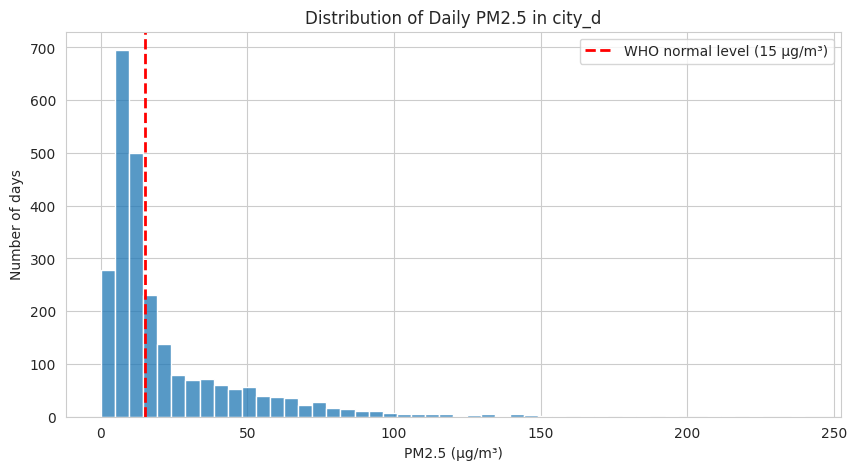

In [39]:
# WHO 24-hour normal level for PM2.5 (µg/m³)
normal_pm25 = 15

sns.histplot(
    city_d["avg_pm2.5"],
    bins=50
)

# Normal level line
plt.axvline(
    normal_pm25,
    color="red",
    linestyle="--",
    linewidth=2,
    label="WHO normal level (15 µg/m³)"
)

plt.title("Distribution of Daily PM2.5 in city_d")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Number of days")
plt.legend()

plt.show()


In [40]:

q1 = city_d["avg_pm2.5"].quantile(0.25)
q2 = city_d["avg_pm2.5"].quantile(0.50)
q3 = city_d["avg_pm2.5"].quantile(0.75)
print(f"Q1={q1}, Q2={q2}, Q3={q3}")

Q1=7.3, Q2=12.0, Q3=26.9


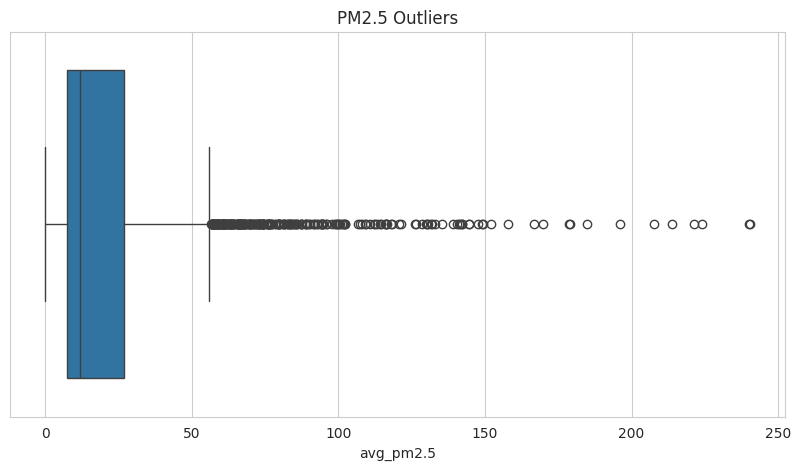

In [41]:
sns.boxplot(x=city_d["avg_pm2.5"])
plt.title("PM2.5 Outliers")
plt.show()

In [42]:

iqr = q3 - q1

# lower and upper bouwnds which help to find
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = city_d[(city_d["avg_pm2.5"] < lower_bound) | (city_d["avg_pm2.5"] > upper_bound)]

outlier_count = len(outliers)

print(f"IQR: {iqr:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Total number of outlier days: {outlier_count}")

IQR: 19.60
Upper Bound: 56.30
Total number of outlier days: 255


In [43]:
city_d["timestamp"] = pd.to_datetime(
    city_d["timestamp"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)

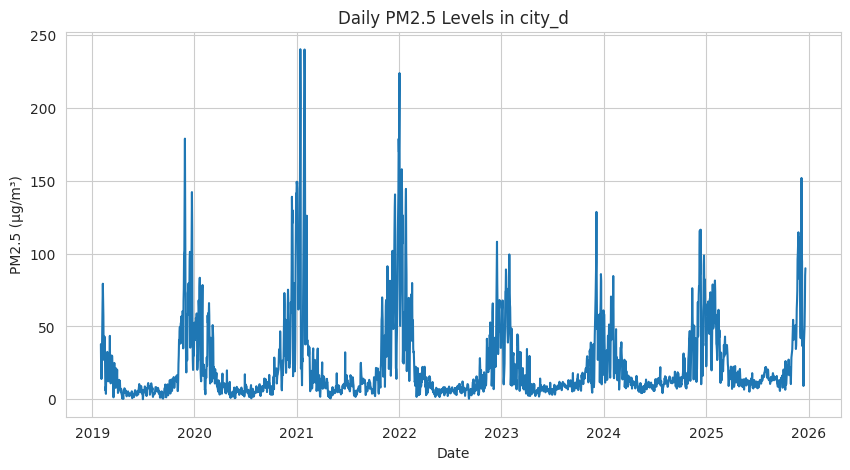

In [44]:
plt.plot(city_d["timestamp"], city_d["avg_pm2.5"])
plt.title("Daily PM2.5 Levels in city_d")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


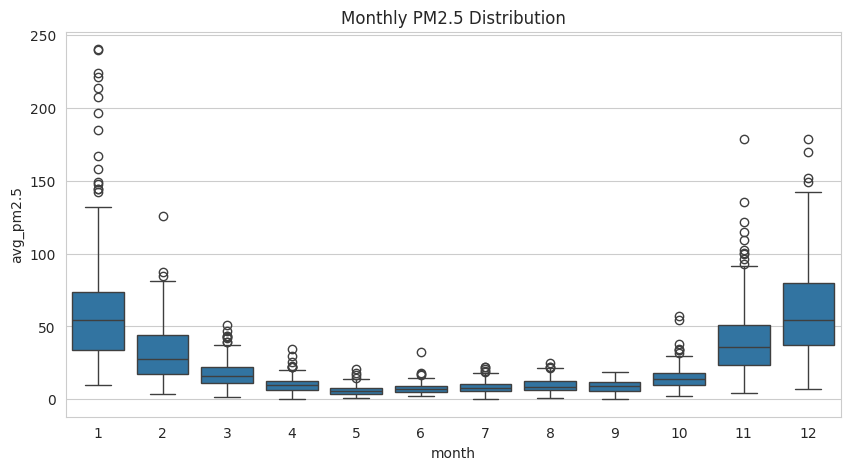

In [45]:
city_d["month"] = city_d["timestamp"].dt.month

sns.boxplot(
    x="month",
    y="avg_pm2.5",
    data=city_d
)
plt.title("Monthly PM2.5 Distribution")
plt.show()


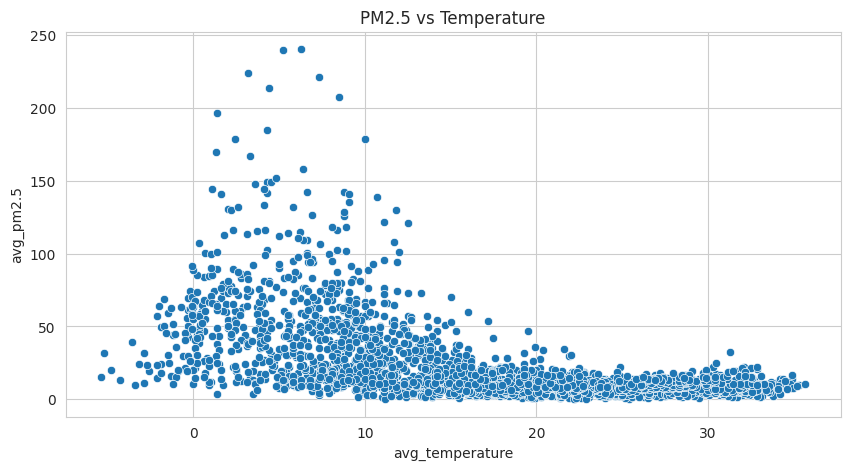

In [46]:
sns.scatterplot(
    x="avg_temperature",
    y="avg_pm2.5",
    data=city_d
)
plt.title("PM2.5 vs Temperature")
plt.show()


In [47]:
city_d

,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,avg_humidity,avg_no2,avg_dust,avg_o3,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh,month
1086,yerevan,2019-02-01,37.8,22.3,65.8,75.2,10.5,8.9,12.9,89869.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1087,yerevan,2019-02-02,20.3,6.2,66.4,51.3,9.4,7.8,11.1,89804.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1088,yerevan,2019-02-03,13.9,5.7,25.3,40.3,9.4,6.9,12.5,90337.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1089,yerevan,2019-02-04,17.6,1.9,37.1,44.6,9.0,5.5,12.7,90927.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1090,yerevan,2019-02-05,35.9,14.9,67.3,72.5,8.6,5.0,12.1,91203.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,yerevan,2025-12-17,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,68.0,25.0,NaN,NaN,NaN,0.0,5.3,28.0,NaN,12
3598,yerevan,2025-12-18,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,65.0,25.0,NaN,NaN,NaN,0.0,4.5,56.0,0.17,12
3599,yerevan,2025-12-19,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,65.0,29.0,NaN,NaN,NaN,0.0,4.0,38.0,0.18,12
3600,yerevan,2025-12-20,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,66.0,31.0,NaN,NaN,NaN,0.0,3.8,42.0,0.17,12


### *The scatter plot shows that there is a inverse relationship between temperature and PM2.5 concentration. High pollution levels more often occur  during colder periods.*

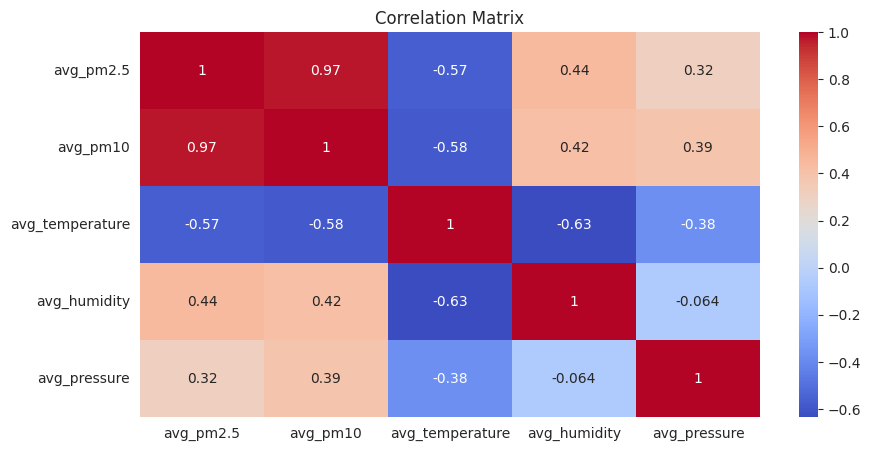

In [48]:
corr_cols = [
    "avg_pm2.5",
    "avg_pm10",
    "avg_temperature",
    "avg_humidity",
    "avg_pressure"
]

sns.heatmap(
    city_d[corr_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()


In [49]:
city_d["day_of_week"] = city_d["timestamp"].dt.dayofweek
city_d["pm25_lag1"] = city_d["avg_pm2.5"].shift(1)    # For each day storing also its previous day PM2.5 level


In [50]:
city_d["is_weekend"] = city_d["day_of_week"] >= 5


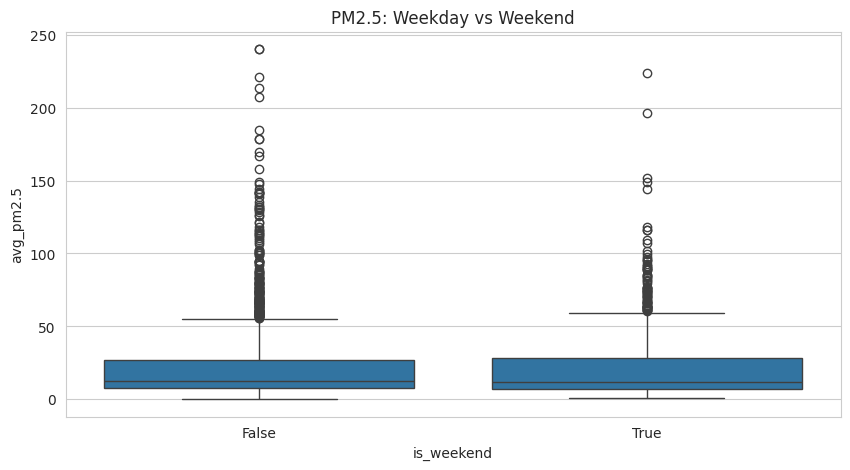

In [51]:
sns.boxplot(
    x="is_weekend",
    y="avg_pm2.5",
    data=city_d
)
plt.title("PM2.5: Weekday vs Weekend")
plt.show()


In [52]:
features = [
    "avg_temperature",
    "avg_humidity",
    "avg_pressure",
    "day_of_week",
    "pm25_lag1"
]

X = city_d[features]
y = city_d["avg_pm2.5"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [53]:
city_d_sensors = sensors[
    (sensors["city_slug"] == "yerevan") &
    (sensors["is_suspicious"] == False)
]

In [54]:
print(city_d_sensors.shape)
city_d_sensors.head()

(444, 15)


,id,station_id,city_slug,district_slug,address_en,title,provider,external_id,sensor_type,latitude,longitude,altitude,first_measurement_time,last_measurement_time,is_suspicious
0,2,1,yerevan,nor-nork,Bagrevand,Engineering City (ArmAqi.org),sensor_community,80681,SDS011,40.200,44.582,1373.1,2023-06-01 04:00:35,2025-11-11 18:20:18,False
1,3,1,yerevan,nor-nork,Bagrevand,Engineering City (ArmAqi.org),sensor_community,80682,BME280,40.200,44.582,1373.1,2023-05-08 19:30:46,2025-11-11 18:20:18,False
2,4,235,yerevan,arabkir,"Komitas street, 17",NaN,sensor_community,80868,SDS011,40.204,44.500,1121.4,2023-06-01 04:00:00,2025-12-23 00:13:48,False
3,5,235,yerevan,arabkir,"Komitas street, 17",NaN,sensor_community,80869,BME280,40.204,44.500,1121.4,2023-05-21 01:00:09,2025-12-23 00:13:47,False
4,7,3,yerevan,davtashen,2nd quarter,Davidashen 2nd block (ArmAqi.org),sensor_community,82926,SDS011,40.224,44.492,1132.3,2023-09-08 19:59:41,2025-12-23 00:14:09,False


In [55]:
merged = sensor_daily.merge(    # sensor_daily contains all sensors data for all days
    city_d_sensors,
    left_on="sensor_id",
    right_on="id",
    how="inner"
)



# area_pollution shows which areas of city_d are more polluted on average.

In [56]:
area_pollution = (
    merged
    .groupby("address_en")["avg_pm2.5"]
    .mean()
    .reset_index()
)


In [57]:
top_10_polluted_areas = (
    area_pollution
    .sort_values("avg_pm2.5", ascending=False)
    .head(10)
)


In [58]:
top_10_polluted_areas = top_10_polluted_areas.rename(
    columns={
        "address_en": "Area (English name)",
        "avg_pm2.5": "Average PM2.5 (µg/m³)"
    }
)

top_10_polluted_areas



,Area (English name),Average PM2.5 (µg/m³)
176,"Zavaryan Street, 1",115.192593
160,"Vagharshyan st, 2/1",77.755128
94,"Khorenatsi street, 47/2",76.300000
91,"Khapantsyan street, 1/10",73.011842
82,"Hrant Vardanyan st, 4",72.661017
81,"Hrant Vardanyan st, 33",65.004918
9,68 Anastas Mikoyan Street,64.092000
134,"Rostoma Street, 29",64.032558
74,"Grigor Lusavorich St, 4",60.754545
0,10 Shinarnari Street,58.337037


In [59]:
top_10_clean_areas = (
    area_pollution
    .sort_values("avg_pm2.5", ascending=True)
    .head(10)
)

In [60]:
top_10_clean_areas = top_10_clean_areas.rename(
    columns={
        "address_en": "Area (English name)",
        "avg_pm2.5": "Average PM2.5 (µg/m³)"
    }
)
top_10_clean_areas

,Area (English name),Average PM2.5 (µg/m³)
59,Djuhai street,8.549223
46,Bagrevand,10.675558
175,Zakyan street,11.561151
18,Adonts street,12.296774
110,Minas Avetisyan street,12.370635
161,Vahagni,13.848810
29,Arshakunyats Avenue (Byuregh),13.950000
35,"Arshakunyats avenue, 278/4",14.517526
111,Moldovakan street,16.096285
143,Sisakyan street,16.400601


Pollution Persistence Analysis (Memory Effect)
Question: Does pollution “linger” over time?

We compute:

Autocorrelation function (ACF-like) for daily city PM2.5
Lag-to-lag correlations: PM2.5(t) vs PM2.5(t-k)
Heatmap of lag correlations (lags 1..30)

In [61]:
city_d = city_d.sort_values("timestamp").copy()

def lag_corrs(series, max_lag=30):
    s = pd.Series(series).dropna().reset_index(drop=True)
    return np.array([s.autocorr(lag) for lag in range(1, max_lag + 1)])

In [62]:
city_d

,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,...,avg_o3,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh,month,day_of_week,pm25_lag1,is_weekend
1086,yerevan,2019-02-01,37.8,22.3,65.8,75.2,10.5,8.9,12.9,89869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,False
1087,yerevan,2019-02-02,20.3,6.2,66.4,51.3,9.4,7.8,11.1,89804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,5,37.8,True
1088,yerevan,2019-02-03,13.9,5.7,25.3,40.3,9.4,6.9,12.5,90337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,6,20.3,True
1089,yerevan,2019-02-04,17.6,1.9,37.1,44.6,9.0,5.5,12.7,90927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,13.9,False
1090,yerevan,2019-02-05,35.9,14.9,67.3,72.5,8.6,5.0,12.1,91203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,17.6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,yerevan,2025-12-17,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,...,NaN,NaN,0.0,5.3,28.0,NaN,12,2,40.2,False
3598,yerevan,2025-12-18,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,...,NaN,NaN,0.0,4.5,56.0,0.17,12,3,45.0,False
3599,yerevan,2025-12-19,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,...,NaN,NaN,0.0,4.0,38.0,0.18,12,4,50.4,False
3600,yerevan,2025-12-20,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,...,NaN,NaN,0.0,3.8,42.0,0.17,12,5,64.0,True


In [63]:
max_lag = 30
ac = lag_corrs(city_d["avg_pm2.5"], max_lag=max_lag)


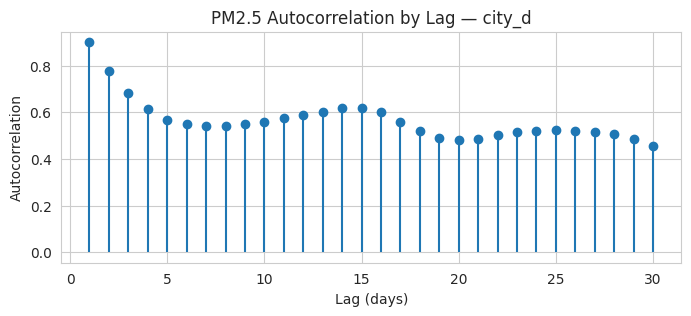

In [64]:
plt.figure(figsize=(8,3))
plt.stem(range(1, max_lag + 1), ac, basefmt=" ")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.title("PM2.5 Autocorrelation by Lag — city_d")
plt.show()

This graph shows how much does yesterday’s (or last week’s) pollution influence today’s pollution.
**Air pollution in city_d is not random — it has long memory.**

In [65]:
city_d

,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,...,avg_o3,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh,month,day_of_week,pm25_lag1,is_weekend
1086,yerevan,2019-02-01,37.8,22.3,65.8,75.2,10.5,8.9,12.9,89869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,False
1087,yerevan,2019-02-02,20.3,6.2,66.4,51.3,9.4,7.8,11.1,89804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,5,37.8,True
1088,yerevan,2019-02-03,13.9,5.7,25.3,40.3,9.4,6.9,12.5,90337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,6,20.3,True
1089,yerevan,2019-02-04,17.6,1.9,37.1,44.6,9.0,5.5,12.7,90927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,13.9,False
1090,yerevan,2019-02-05,35.9,14.9,67.3,72.5,8.6,5.0,12.1,91203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,17.6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,yerevan,2025-12-17,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,...,NaN,NaN,0.0,5.3,28.0,NaN,12,2,40.2,False
3598,yerevan,2025-12-18,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,...,NaN,NaN,0.0,4.5,56.0,0.17,12,3,45.0,False
3599,yerevan,2025-12-19,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,...,NaN,NaN,0.0,4.0,38.0,0.18,12,4,50.4,False
3600,yerevan,2025-12-20,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,...,NaN,NaN,0.0,3.8,42.0,0.17,12,5,64.0,True


yerevan extreme threshold (95th percentile) = 76.03 µg/m³ | extreme days: 126 of 2516


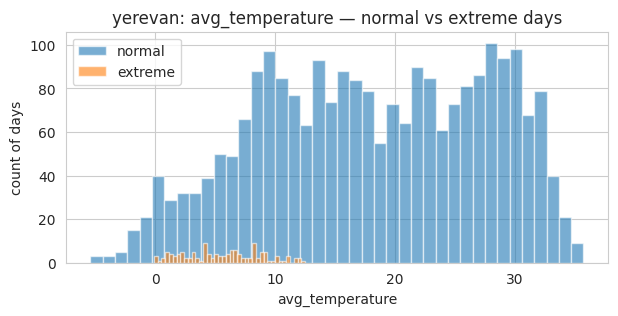

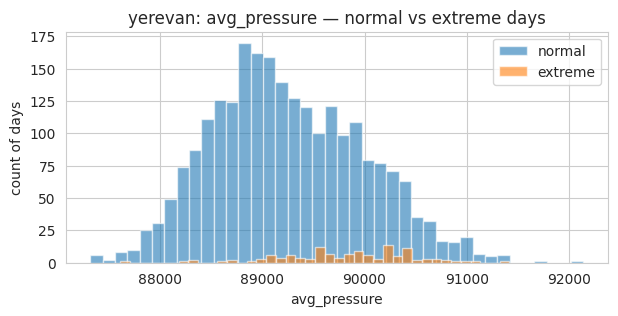

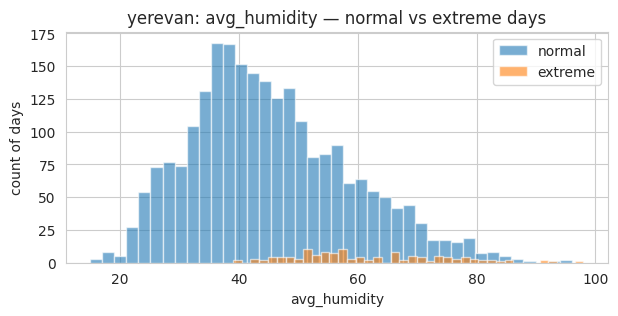

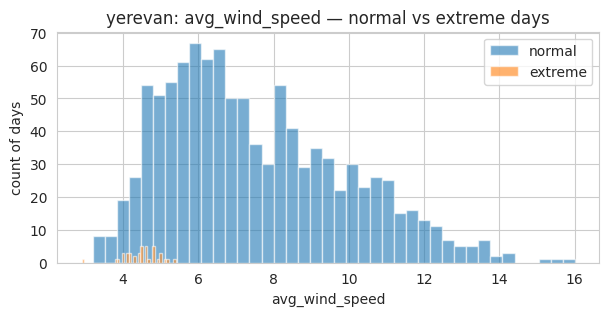

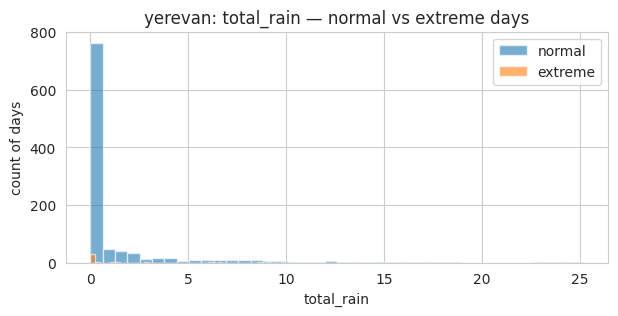

In [66]:
def extreme_days(df, q=0.95):
    thr = df["avg_pm2.5"].quantile(q)
    out = df.copy()
    out["is_extreme"] = out["avg_pm2.5"] >= thr
    return out, thr

weather_cols = [
    "avg_temperature",
    "avg_pressure",
    "avg_humidity",
    "avg_wind_speed",
    "total_rain"
]

available_weather = [c for c in weather_cols if c in city_d.columns]

yerevan_extreme, thr = extreme_days(city_d, q=0.95)

print(
    "yerevan",
    "extreme threshold (95th percentile) =",
    round(float(thr), 2), "µg/m³",
    "| extreme days:",
    int(yerevan_extreme["is_extreme"].sum()),
    "of",
    len(yerevan_extreme)
)

for col in available_weather:
    extreme_vals = yerevan_extreme.loc[yerevan_extreme["is_extreme"], col].dropna()
    normal_vals = yerevan_extreme.loc[~yerevan_extreme["is_extreme"], col].dropna()

    plt.figure(figsize=(7,3))
    plt.hist(normal_vals, bins=40, alpha=0.6, label="normal")
    plt.hist(extreme_vals, bins=40, alpha=0.6, label="extreme")

    plt.title(f"yerevan: {col} — normal vs extreme days")
    plt.xlabel(col)
    plt.ylabel("count of days")
    plt.legend()
    plt.show()

In [67]:
city_d

,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,...,avg_o3,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh,month,day_of_week,pm25_lag1,is_weekend
1086,yerevan,2019-02-01,37.8,22.3,65.8,75.2,10.5,8.9,12.9,89869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,False
1087,yerevan,2019-02-02,20.3,6.2,66.4,51.3,9.4,7.8,11.1,89804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,5,37.8,True
1088,yerevan,2019-02-03,13.9,5.7,25.3,40.3,9.4,6.9,12.5,90337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,6,20.3,True
1089,yerevan,2019-02-04,17.6,1.9,37.1,44.6,9.0,5.5,12.7,90927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,13.9,False
1090,yerevan,2019-02-05,35.9,14.9,67.3,72.5,8.6,5.0,12.1,91203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,17.6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,yerevan,2025-12-17,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,...,NaN,NaN,0.0,5.3,28.0,NaN,12,2,40.2,False
3598,yerevan,2025-12-18,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,...,NaN,NaN,0.0,4.5,56.0,0.17,12,3,45.0,False
3599,yerevan,2025-12-19,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,...,NaN,NaN,0.0,4.0,38.0,0.18,12,4,50.4,False
3600,yerevan,2025-12-20,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,...,NaN,NaN,0.0,3.8,42.0,0.17,12,5,64.0,True


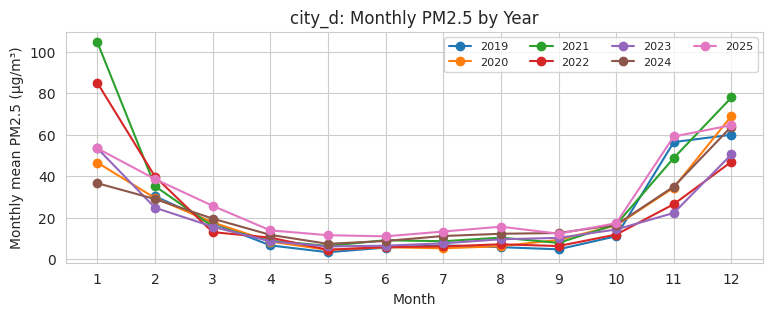

In [68]:
def add_time_parts(df):
    out = df.copy()
    out["timestamp"] = pd.to_datetime(out["timestamp"])
    out["year"] = out["timestamp"].dt.year
    out["month"] = out["timestamp"].dt.month
    return out

city_d_t = add_time_parts(city_d)

monthly = (
    city_d_t
    .groupby(["year", "month"])["avg_pm2.5"]
    .mean()
    .reset_index()
    .sort_values(["year", "month"])
)

monthly["mom_change"] = (
    monthly
    .groupby("year")["avg_pm2.5"]
    .diff()
)

plt.figure(figsize=(9,3))

for year, g in monthly.groupby("year"):
    plt.plot(g["month"], g["avg_pm2.5"], marker="o", label=str(year))

plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Monthly mean PM2.5 (µg/m³)")
plt.title("city_d: Monthly PM2.5 by Year")
plt.legend(ncol=4, fontsize=8)
plt.show()


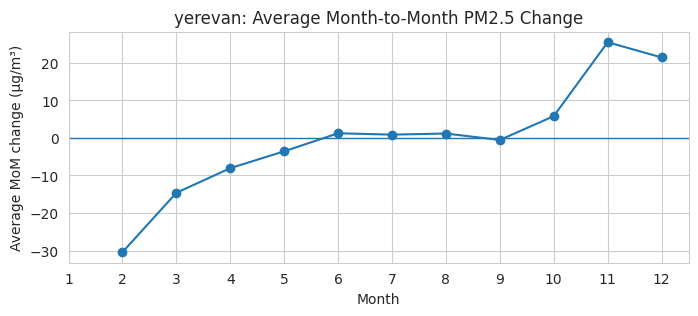

In [69]:
mom = monthly.groupby("month")["mom_change"].mean()

plt.figure(figsize=(8,3))
plt.plot(mom.index, mom.values, marker="o")
plt.axhline(0, linewidth=1)
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average MoM change (µg/m³)")
plt.title("yerevan: Average Month-to-Month PM2.5 Change")
plt.show()


In [70]:
city_d_t

,city_slug,timestamp,avg_pm2.5,min_pm2.5,max_pm2.5,avg_pm10,avg_temperature,min_temperature,max_temperature,avg_pressure,...,avg_so2,total_rain,avg_wind_speed,avg_wind_direction,avg_usvh,month,day_of_week,pm25_lag1,is_weekend,year
1086,yerevan,2019-02-01,37.8,22.3,65.8,75.2,10.5,8.9,12.9,89869.0,...,NaN,NaN,NaN,NaN,NaN,2,4,NaN,False,2019
1087,yerevan,2019-02-02,20.3,6.2,66.4,51.3,9.4,7.8,11.1,89804.0,...,NaN,NaN,NaN,NaN,NaN,2,5,37.8,True,2019
1088,yerevan,2019-02-03,13.9,5.7,25.3,40.3,9.4,6.9,12.5,90337.0,...,NaN,NaN,NaN,NaN,NaN,2,6,20.3,True,2019
1089,yerevan,2019-02-04,17.6,1.9,37.1,44.6,9.0,5.5,12.7,90927.0,...,NaN,NaN,NaN,NaN,NaN,2,0,13.9,False,2019
1090,yerevan,2019-02-05,35.9,14.9,67.3,72.5,8.6,5.0,12.1,91203.0,...,NaN,NaN,NaN,NaN,NaN,2,1,17.6,False,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,yerevan,2025-12-17,45.0,30.6,74.6,71.0,2.2,-1.4,7.3,89774.0,...,NaN,0.0,5.3,28.0,NaN,12,2,40.2,False,2025
3598,yerevan,2025-12-18,50.4,34.2,91.2,78.2,2.0,-1.0,7.2,90113.0,...,NaN,0.0,4.5,56.0,0.17,12,3,45.0,False,2025
3599,yerevan,2025-12-19,64.0,40.4,117.2,97.7,1.4,-2.1,6.6,89886.0,...,NaN,0.0,4.0,38.0,0.18,12,4,50.4,False,2025
3600,yerevan,2025-12-20,85.0,50.1,148.4,126.7,1.1,-2.3,6.5,89580.0,...,NaN,0.0,3.8,42.0,0.17,12,5,64.0,True,2025


In [71]:

yerevan_ml = city_d.copy()

# making timestamp coluumn datetime
yerevan_ml["timestamp"] = pd.to_datetime(yerevan_ml["timestamp"])

# Adding new columns
yerevan_ml["day_of_week"] = yerevan_ml["timestamp"].dt.dayofweek
yerevan_ml["pm25_lag1"] = yerevan_ml["avg_pm2.5"].shift(1)


yerevan_ml = yerevan_ml.dropna().copy()


In [72]:
features = [
    "avg_temperature",
    "avg_humidity",
    "avg_pressure",
    "day_of_week",
    "pm25_lag1"
]

X = yerevan_ml[features]
y = yerevan_ml["avg_pm2.5"]


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False   # keeps time order
)


In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [75]:
preds = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

rmse


np.float64(24.21753236234543)

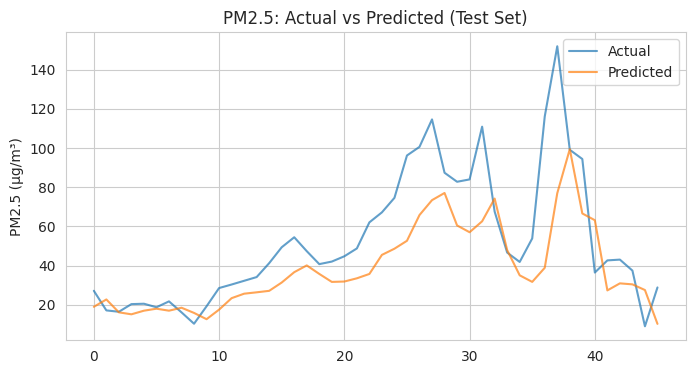

In [76]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(preds, label="Predicted", alpha=0.7)
plt.title("PM2.5: Actual vs Predicted (Test Set)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()
